# Feature Distribution Analysis

Visualizing the distribution of each feature to determine if transformations and outlier removal methods are required.

In [1]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

/Users/engineererjojo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
df = pd.read_csv('../flightd-delay-dataset.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Considering any flight is delay after 15 minutes
df = df[df['DEP_DELAY'] >= 15]

In [4]:
# print columns after 
# df = df.drop(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE',
#        'CRS_DEP_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity','Wind Speed', 
#        'Wind Gust', 'Pressure', 'sch_dep', 'DEP_DELAY'])
# print(df.columns)

# for col_name in df.columns:
#     print(col_name)

### Correlation Graphs (Feature Distribution)

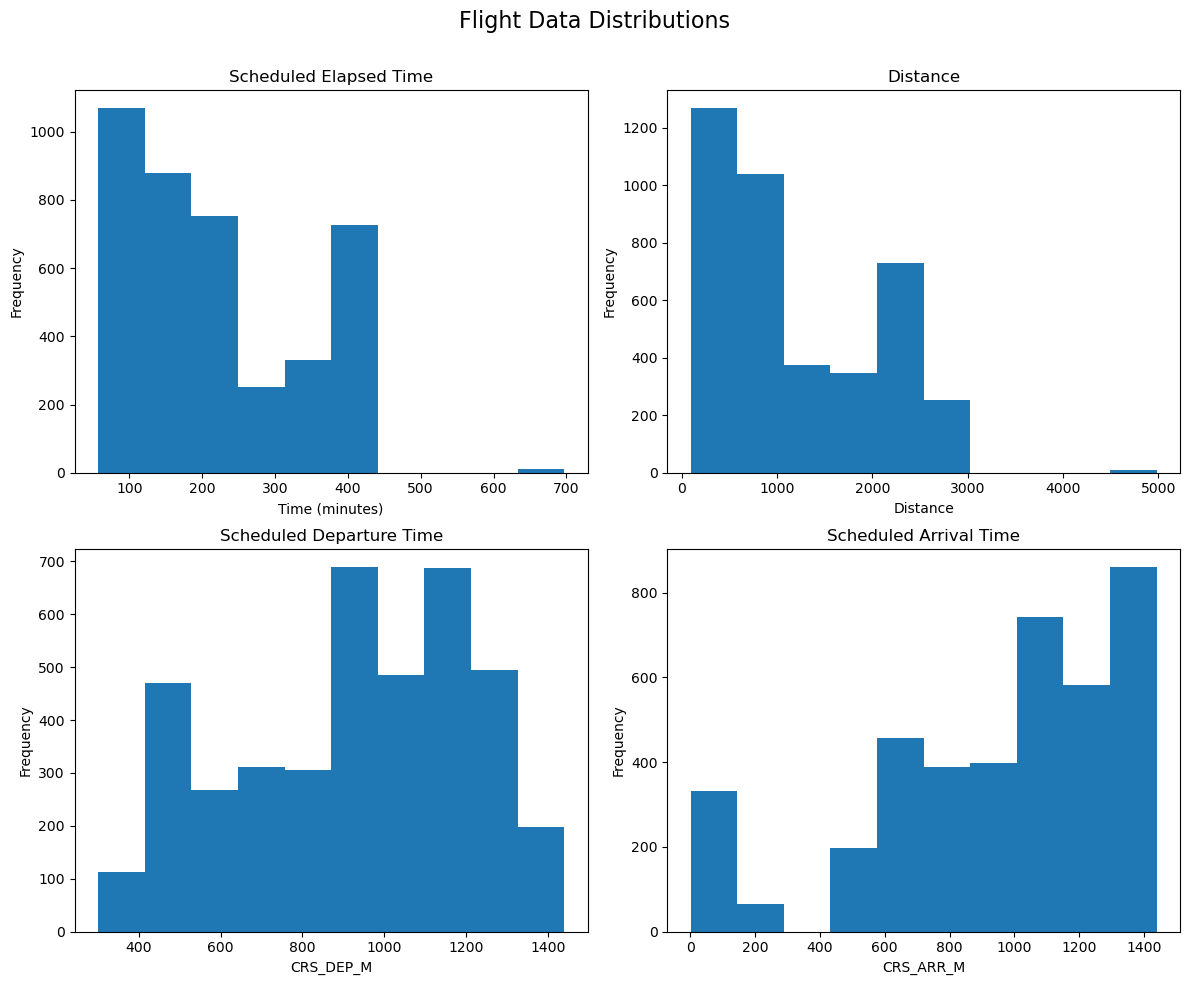

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms with labels
axs[0, 0].hist('CRS_ELAPSED_TIME', data=df)
axs[0, 0].set_title('Scheduled Elapsed Time')
axs[0, 0].set_xlabel('Time (minutes)')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist('DISTANCE', data=df)
axs[0, 1].set_title('Distance')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist('CRS_DEP_M', data=df)
axs[1, 0].set_title('Scheduled Departure Time')
axs[1, 0].set_xlabel('CRS_DEP_M')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist('CRS_ARR_M', data=df)
axs[1, 1].set_title('Scheduled Arrival Time')
axs[1, 1].set_xlabel('CRS_ARR_M')
axs[1, 1].set_ylabel('Frequency')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

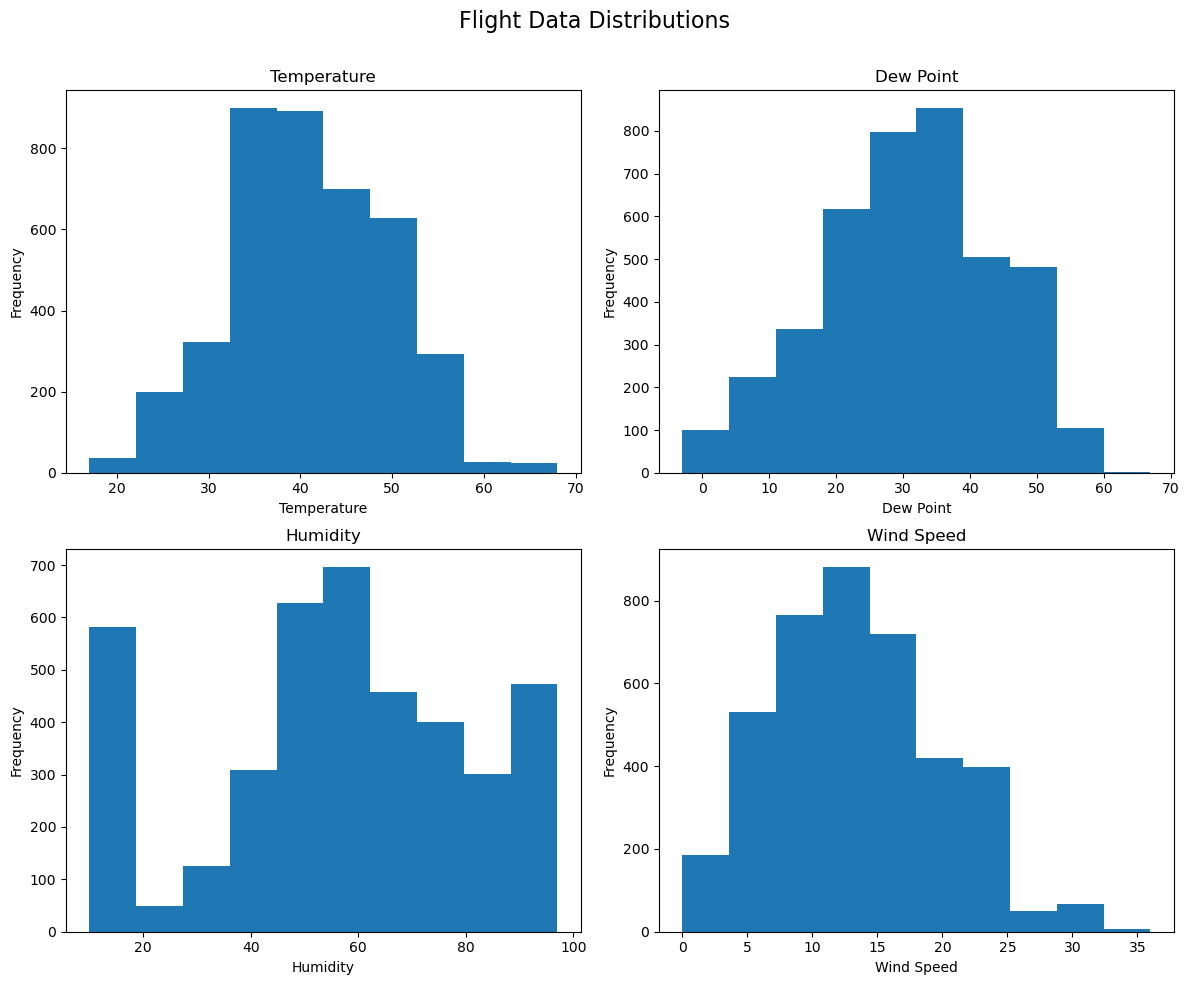

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms with labels
axs[0, 0].hist('Temperature', data=df)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist('Dew Point', data=df)
axs[0, 1].set_title('Dew Point')
axs[0, 1].set_xlabel('Dew Point')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist('Humidity', data=df)
axs[1, 0].set_title('Humidity')
axs[1, 0].set_xlabel('Humidity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist('Wind Speed', data=df)
axs[1, 1].set_title('Wind Speed')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Frequency')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

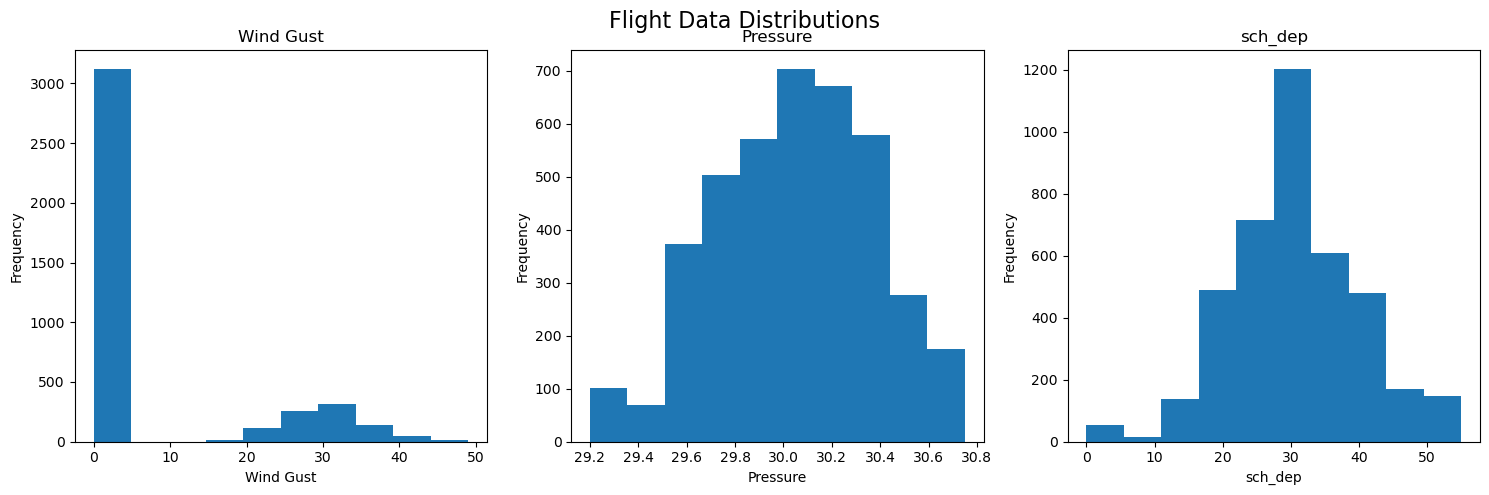

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with labels
axs[0].hist(df['Wind Gust'])
axs[0].set_title('Wind Gust')
axs[0].set_xlabel('Wind Gust')
axs[0].set_ylabel('Frequency')

axs[1].hist('Pressure', data=df)
axs[1].set_title('Pressure')
axs[1].set_xlabel('Pressure')
axs[1].set_ylabel('Frequency')

axs[2].hist('sch_dep', data=df)
axs[2].set_title('sch_dep')
axs[2].set_xlabel('sch_dep')
axs[2].set_ylabel('Frequency')


# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### Feature that requires transformation or removing outilers

Removing Outilers
- CRS_ELAPSED_TIME (>600)
- DISTANCE (>4000)
- CRS_ARR_M (<400)

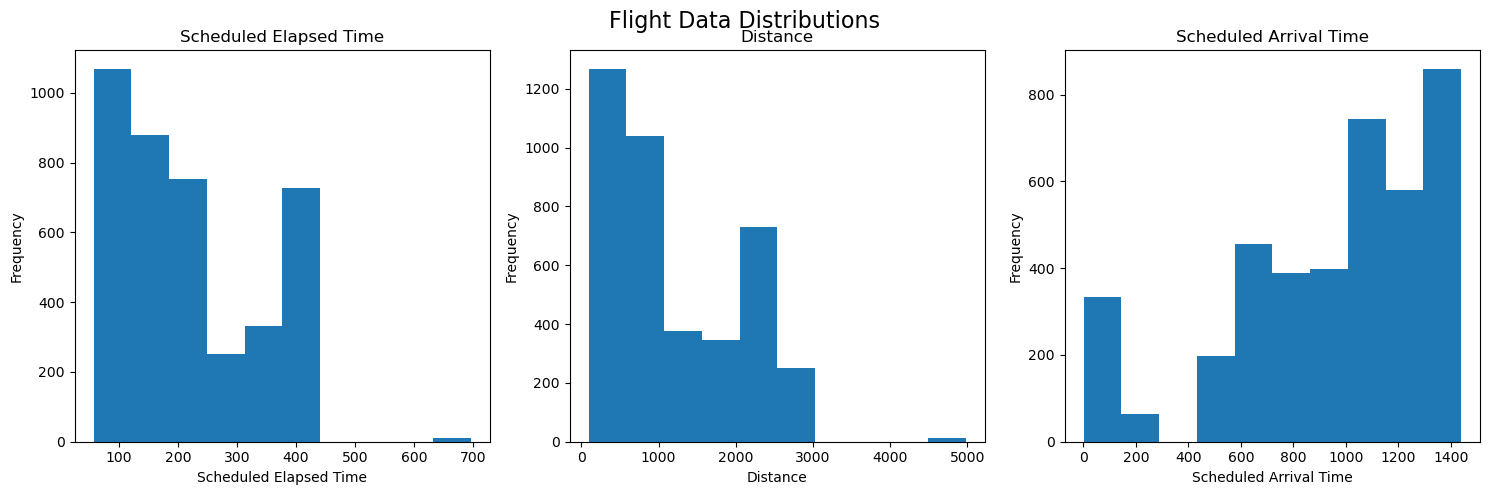

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with labels
axs[0].hist(df['CRS_ELAPSED_TIME'])
axs[0].set_title('Scheduled Elapsed Time')
axs[0].set_xlabel('Scheduled Elapsed Time')
axs[0].set_ylabel('Frequency')

axs[1].hist('DISTANCE', data=df)
axs[1].set_title('Distance')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')

axs[2].hist('CRS_ARR_M', data=df)
axs[2].set_title('Scheduled Arrival Time')
axs[2].set_xlabel('Scheduled Arrival Time')
axs[2].set_ylabel('Frequency')


# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

In [9]:
# Filtering df with Features Outiler Requirments
df = df[df['CRS_ELAPSED_TIME'] < 600]
df = df[df['DISTANCE'] < 4000]
df = df[df['CRS_ARR_M'] > 400]

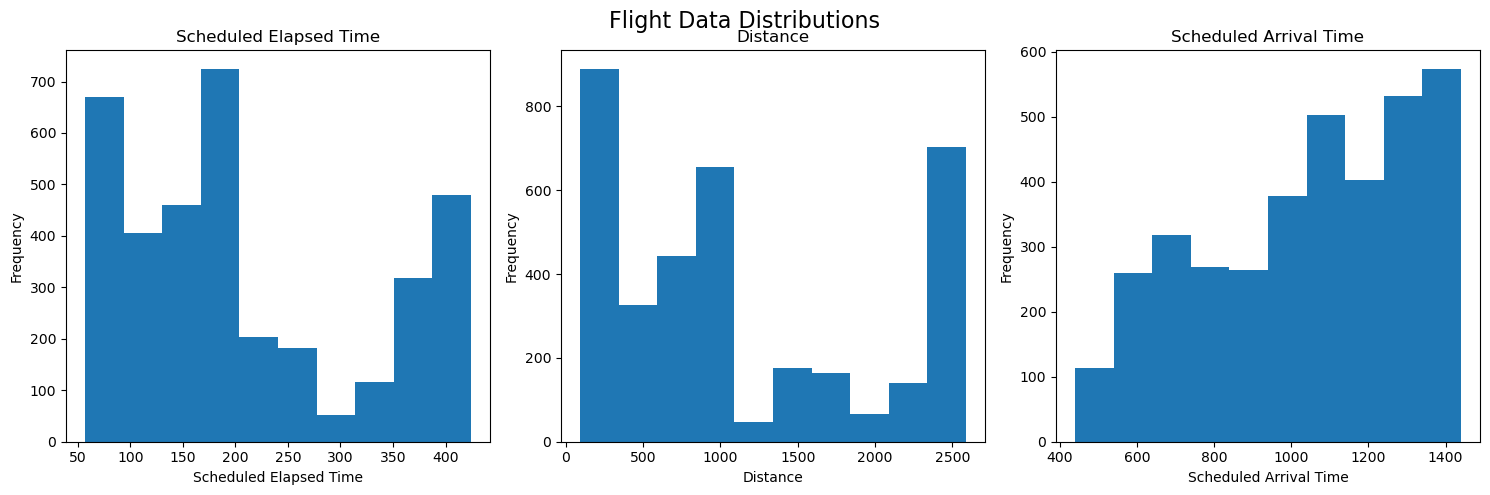

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with labels
axs[0].hist(df['CRS_ELAPSED_TIME'])
axs[0].set_title('Scheduled Elapsed Time')
axs[0].set_xlabel('Scheduled Elapsed Time')
axs[0].set_ylabel('Frequency')

axs[1].hist('DISTANCE', data=df)
axs[1].set_title('Distance')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')

axs[2].hist('CRS_ARR_M', data=df)
axs[2].set_title('Scheduled Arrival Time')
axs[2].set_xlabel('Scheduled Arrival Time')
axs[2].set_ylabel('Frequency')


# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### Conclusion 

After viewing the distribution of each feature, remove outilers for 3 features